## Cleaning the data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
#Sets up the datetime/accession number
def first_cleanse(file):
    df = pd.read_csv(file, names=['Date','Time','Accession'])
    df['Datetime'] = df['Date'] + ' ' + df['Time']
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df = df.set_index(df['Datetime'], inplace=True)
    #df['Counts'] = (df.groupby(['Datetime'])['Accession'].transform('count'))
    #df['Normalized'] = (df['Counts']-min(df['Counts'])) / (max(df['Counts']) - min(df['Counts']))
    return df

In [23]:
filename = '~/galvanize/capstones/PredictingSearches-on-EDGAR/Log2004/test_04n05.csv'

In [24]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
    mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
             " columns that have missing values.")
    #mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
    return mz_table

In [25]:
df = first_cleanse(filename)

In [16]:
def feature_eng(df):
    df['Counts'] = (df.groupby['Accession'].transform('count'))
    df['Normalized'] = (df['Counts']-min(df['Counts'])) / (max(df['Counts']) - min(df['Counts']))
    return df

In [26]:
df.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [5]:
missing_zero_values_table(df)

NameError: name 'df' is not defined

## Filtering the data for only the frequently searched for documents

In [108]:
def filterer(df, threshold=.15):
    df['Counts'] = (df.groupby(['datetime'])['accession'].transform('count'))
    df['Normalized'] = (df['Counts']-min(df['Counts'])) / (max(df['Counts']) - min(df['Counts']))
    return df[df['Normalized'] > threshold]

In [109]:
dff = filterer(df)

## Plotting the Document Count Distribution

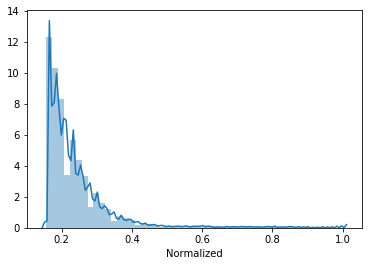

In [110]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

#sns.distplot(df['Counts'])
sns.distplot(dff['Normalized'])

In [116]:
df.time

0         00:00:00
1         00:00:00
2         00:00:01
3         00:00:02
4         00:00:03
            ...   
9236888   23:59:55
9236889   23:59:56
9236890   23:59:57
9236891   23:59:58
9236892   23:59:58
Name: time, Length: 9236870, dtype: timedelta64[ns]

Text(0.5,0,'Time')

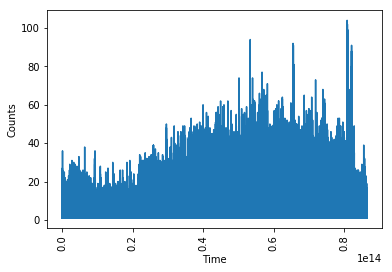

In [117]:
plt.plot(df.time, df['Counts'])
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.xlabel('Time')

In [94]:
plt.plot(df.index.to_pydatetime(), df['Counts'])
plt.xticks(rotation=90)

AttributeError: 'NoneType' object has no attribute 'index'

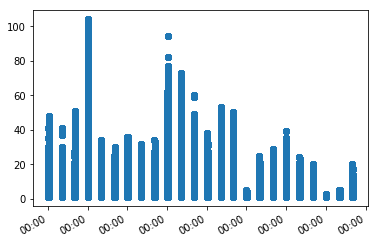

In [72]:
import matplotlib
dates = matplotlib.dates.date2num(df.index)
values = df['Counts']
plt.plot_date(dates, values)
plt.xticks(rotation=90)
plt.gcf().autofmt_xdate()
myFmt = matplotlib.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)